In [23]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from wingstructure.liftingline import multhopp, _solve_multhopp

π = np.pi

# Validation Multhopp Method

## Circulation Distribution

Reference data taken from *H.Schlichting, E.Truckenbrodt-Aerodynamik des Flugzeugs*

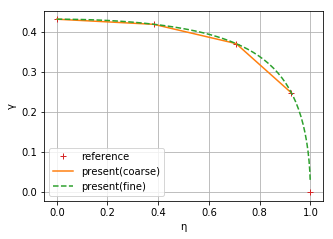

In [24]:
plt.figure(figsize=(5,3.5))

Λ = 6 # aspect ratio of wing
    
b = 15 # m span width
cs = [b/Λ]*2 # depth of wing
ys = [0,b/2] # section positions

αs = [1]*2 # angle of attack
dcls = [2*np.pi]*2

# reference results
ηs_ref = [0,0.3827,0.7071,0.9239,1]
γs_ref = [0.4320,0.4192,0.3710,0.2485,0]

plt.plot(ηs_ref, γs_ref, 'C3+', label='reference')

# coarse calculation
M = 7

res = multhopp(αs, cs, ys, dcls, M = M, mode='gamma')
res2 = multhopp(αs, cs, ys, dcls, M = M, mode='combined')
res3 = multhopp(αs, cs, ys, dcls, M = 91, mode='combined')
res4 = multhopp(αs, cs, ys, dcls, M = 191, mode='combined')

plt.plot(res[0][M//2:]/b*2, res[1][M//2:], 'C1', label='present(coarse)')


# finer calculation
M = 91

res5 = multhopp(αs, cs, ys, dcls, M = M, mode='gamma')

plt.plot(res5[0][M//2:]/b*2, res5[1][M//2:], 'C2--', label='present(fine)')

# layout
plt.xlabel('η')
plt.ylabel('γ')
plt.grid()
plt.legend(loc='best');

plt.savefig('validation_multhopp.pdf', bbox_inches='tight')

In [25]:
np.isclose(res[0][7//2:]/(b/2), ηs_ref[:-1], atol=1e-4)

array([ True,  True,  True,  True])

In [28]:
res[1]

array([0.24852904, 0.37105078, 0.41916023, 0.43196942, 0.41916023,
       0.37105078, 0.24852904])

In [26]:
res[1][7//2:]/(b/2), γs_ref[:-1]

(array([0.05759592, 0.05588803, 0.04947344, 0.03313721]),
 [0.432, 0.4192, 0.371, 0.2485])

In [31]:
np.isclose(res[1][7//2:], γs_ref[:-1], atol=1e-4)

array([ True,  True,  True,  True])

In [11]:
res2.C_Wi, res3.C_Wi

(1.1377841172797578, 1.1414529678222174)

In [12]:
B = np.array([[0.0, -1.8809863136978353, -0.0, -0.14644660940672627, -0.0, -0.03322724867526077, -0.0], [-1.0179824574016396, 0.0, -1.0972387912921928, -0.0, -0.09723879129219262, -0.0, -0.017982457401639017], [-0.0, -0.8397902135516373, 0.0, -0.8535533905932737, -0.0, -0.07442334882145776, -0.0], [-0.05604269114599566, -0.0, -0.7885805074747375, 0.0, -0.7885805074747375, -0.0, -0.056042691145995645], [-0.0, -0.07442334882145775, -0.0, -0.8535533905932737, 0.0, -0.8397902135516374, -0.0], [-0.01798245740163902, -0.0, -0.09723879129219262, -0.0, -1.0972387912921928, 0.0, -1.017982457401639], [-0.0, -0.03322724867526076, -0.0, -0.1464466094067262, -0.0, -1.8809863136978338, 0.0]])

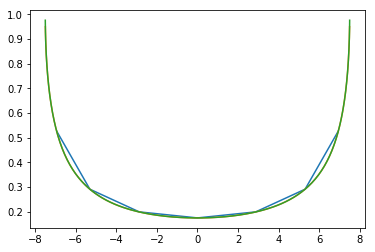

In [13]:
plt.plot(res2.ys, res2.αis)
plt.plot(res3.ys, res3.αis)
plt.plot(res4.ys, res4.αis)

In [15]:
res4.C_Wi, res4.C_L**2/(π*Λ), res4.C_L

(1.1414531335131521, 1.0888718324405413, 4.530424979731633)